## Apache Spark Practices (local)

These are small practices to understand Apache Spark, with local mode

This can be run on Google Colab

### Spark Lazy Evaluation

this is to understand lazy evaluation of Spark

In [0]:
!sudo apt-get purge openjdk-\* icedtea-\* icedtea6-\*
!sudo apt install openjdk-8-jre-headless 

In [0]:
!pip install pyspark

In [0]:
import pyspark
sc = pyspark.SparkContext(appName='map_practice')

In [0]:
log_of_songs = [
      "Fly me to the moon",
      "Autumn leaves",
      "all the things you are",
      "fly me to the moon",
      "GEORGIA ON MY MIND",
]

make the list into lower case

In [4]:
distributed_song_log = sc.parallelize(log_of_songs)
print(distributed_song_log)

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195


In [5]:
distributed_song_log.map(lambda x: x.lower()).collect()

['fly me to the moon',
 'autumn leaves',
 'all the things you are',
 'fly me to the moon',
 'georgia on my mind']

with collect(), the result shows

In [6]:
distributed_song_log.map(lambda x: x.lower())

PythonRDD[2] at RDD at PythonRDD.scala:53

without that, the result wont be shown and the processes are atcually not implemented

### Reading and Writing Data with Spark

In [0]:
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession

In [0]:
# creating session

sc = SparkSession\
     .builder\
     .appName('Reading and writing data')\
     .getOrCreate()

In [13]:
sc.sparkContext.getConf().getAll()

[('spark.app.name', 'Reading and writing data'),
 ('spark.app.id', 'local-1574660640730'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.host', '4bfd1ad5446a'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.port', '35405'),
 ('spark.ui.showConsoleProgress', 'true')]

In [0]:
# read data from Google Drive
from google.colab import drive
drive.mount("/content/drive/")

In [0]:
# loading data as JSON
file_path = './drive/My Drive/sparkify_log_small.json'
user_log = sc.read.json(file_path)

In [45]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [46]:
user_log.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [49]:
user_log.show(n=10)

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [50]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [0]:
# save as CSV 

save_path = './drive/My Drive/sparkify_log_small.csv'

user_log.write.save(save_path, format='csv', header=True)


In [0]:
# loading as CSV
user_log_c = spark.read.csv(save_path, header=True)

In [59]:
user_log_c.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: string (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: string (nullable = true)
 |-- sessionId: string (nullable = true)
 |-- song: string (nullable = true)
 |-- status: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [60]:
user_log_c.show(n=10)

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [61]:
user_log_c.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession='112', lastName='Matthews', length='232.93342', level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration='1509380319284', sessionId='5132', song='Christmas Tears Will Fall', status='200', ts='1513720872284', userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession='7', lastName='Chase', length='195.23873', level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration='1512718541284', sessionId='5027', song='Cheryl Tweedy', status='200', ts='1513720878284', userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', a

In [62]:
user_log_c.select("artist")

DataFrame[artist: string]

In [63]:
user_log_c.select("artist").show()

+--------------------+
|              artist|
+--------------------+
|       Showaddywaddy|
|          Lily Allen|
|Cobra Starship Fe...|
|          Alex Smoke|
|                null|
|                null|
|              Redman|
|     Ulrich Schnauss|
|                null|
|                null|
|               Jay-Z|
|         Evanescence|
|     Scissor Sisters|
|        3 Doors Down|
|       George Younce|
|              Aly-Us|
|                null|
|            BjÃÂ¶rk|
|      David Bromberg|
|          Nickelback|
+--------------------+
only showing top 20 rows



In [67]:
user_log_c.describe('itemInSession').show()

+-------+------------------+
|summary|     itemInSession|
+-------+------------------+
|  count|             10000|
|   mean|           19.6734|
| stddev|25.382114916132593|
|    min|                 0|
|    max|                99|
+-------+------------------+



In [68]:
user_log_c.count()

10000

In [73]:
user_log_c.select('artist').dropDuplicates().sort('artist').count()

3618

In [77]:
user_log_c.select(['userId','firstname', 'page', 'song']).where(user_log_c.userId == '100')

DataFrame[userId: string, firstname: string, page: string, song: string]

In [78]:
user_log_c.select(['userId','firstname', 'page', 'song']).where(user_log_c.userId == '100').show()

+------+---------+--------+--------------------+
|userId|firstname|    page|                song|
+------+---------+--------+--------------------+
|   100|   Elijah|NextSong|                1972|
|   100|   Elijah|NextSong|             Secrets|
|   100|   Elijah|    Home|                null|
|   100|   Elijah|NextSong|Don't It Make My ...|
|   100|   Elijah|NextSong|Clouds (Of Color ...|
|   100|   Elijah|    Home|                null|
|   100|   Elijah|NextSong|                0010|
|   100|   Elijah|    Home|                null|
+------+---------+--------+--------------------+



In [79]:
user_log_c.select(['userId','firstname', 'page', 'song']).where(user_log_c.userId == '100').collect()

[Row(userId='100', firstname='Elijah', page='NextSong', song='1972'),
 Row(userId='100', firstname='Elijah', page='NextSong', song='Secrets'),
 Row(userId='100', firstname='Elijah', page='Home', song=None),
 Row(userId='100', firstname='Elijah', page='NextSong', song="Don't It Make My Brown Eyes Blue"),
 Row(userId='100', firstname='Elijah', page='NextSong', song='Clouds (Of Color Bright Album Version)'),
 Row(userId='100', firstname='Elijah', page='Home', song=None),
 Row(userId='100', firstname='Elijah', page='NextSong', song='0010'),
 Row(userId='100', firstname='Elijah', page='Home', song=None)]

### Calculationg Statistics by Hour

In [0]:
from pyspark.sql.functions import udf
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
import numpy as np

In [0]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(int(x) / 1000). hour)

In [106]:
user_log_c.select(['ts']).describe()

DataFrame[summary: string, ts: string]

In [107]:
user_log_h = user_log_c.withColumn('hour', get_hour(user_log_c.ts))
print(user_log_h.head())

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession='112', lastName='Matthews', length='232.93342', level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration='1509380319284', sessionId='5132', song='Christmas Tears Will Fall', status='200', ts='1513720872284', userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22')


In [0]:
songs_in_hour = user_log_h.filter(user_log_h.page=='NextSong').groupby(user_log_h.hour).count().orderBy(user_log_h.hour.cast('float'))

In [110]:
songs_in_hour.show(24)

+----+-----+
|hour|count|
+----+-----+
|   0|  456|
|   1|  454|
|   2|  382|
|   3|  302|
|   4|  352|
|   5|  276|
|   6|  348|
|   7|  358|
|   8|  375|
|   9|  249|
|  10|  216|
|  11|  228|
|  12|  251|
|  13|  339|
|  14|  462|
|  15|  479|
|  16|  484|
|  17|  430|
|  18|  362|
|  19|  295|
|  20|  257|
|  21|  248|
|  22|  369|
|  23|  375|
+----+-----+



In [113]:
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)  # this is to remove strings just in case
songs_in_hour_pd

,hour,count
0,0,456
1,1,454
2,2,382
3,3,302
4,4,352
5,5,276
6,6,348
7,7,358
8,8,375
9,9,249


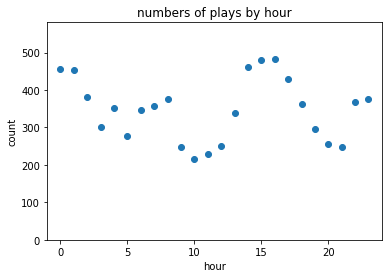

In [117]:
plt.scatter(songs_in_hour_pd['hour'], songs_in_hour_pd['count'])
plt.xlim(-1, 24)
plt.ylim((0, 1.2 * max(songs_in_hour_pd['count'])))
plt.xlabel('hour')
plt.ylabel('count')
plt.title('numbers of plays by hour')
pass 

### Drop rows with missing values

In [119]:
user_log_valid = user_log_c.dropna(how='any', subset=['userId', 'sessionId'])
user_log_valid.count()

9664

### Spark SQL

In [0]:
# Temporary SQL view
user_log_c.createOrReplaceTempView('user_log_table')

In [147]:
spark.sql('''
          SELECT *
          FROM user_log_table
          LIMIT 5
          '''
          ).show()

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [149]:
spark.sql('''
          SELECT count(*)
          FROM user_log_table
          LIMIT 1
          '''
          ).show()

+--------+
|count(1)|
+--------+
|   10000|
+--------+



In [150]:
spark.sql('''
          SELECT *
          FROM user_log_table
          WHERE userID == '100'
          '''
          ).show()

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|   Josh Rouse|Logged In|   Elijah|     M|            0|   Moore|228.93669| free|New Orleans-Metai...|   PUT|NextSong|1488073913284|     5762|                1972|   200|1513750214284|"Mozilla/5.0 (Win...|   100|
|  OneRepublic|Logged In|   Elijah|     M|            1|   Moore|224.67873| free|New Orleans-Metai...|   PUT|NextSong|1488073913284|     5762|      

In [154]:
# using user defined function

spark.udf.register('get_hour', lambda x: datetime.datetime.fromtimestamp(int(x)/ 1000.0).hour)

spark.sql('''
          SELECT *, get_hour(ts) AS hour
          FROM user_log_table
          LIMIT 5

          '''
          ).show()

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|hour|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|  22|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shrevep